In [258]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

In [259]:
train = pd.read_csv(r"C:\Users\ABC\OneDrive\Desktop\train.csv")

In [260]:
train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [356]:
test= pd.read_csv(r"C:\Users\ABC\OneDrive\Desktop\test.csv")

In [357]:
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [263]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [264]:
train.iloc[:,2:].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [265]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

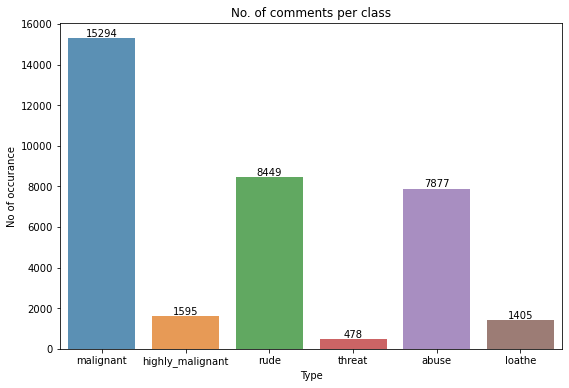

In [266]:
plt.figure(figsize=[9,6])
aa = sns.barplot(train.iloc[:,2:].sum().index,train.iloc[:,2:].sum().values,alpha=0.8)
plt.title("No. of comments per class")
plt.ylabel("No of occurance")
plt.xlabel('Type')
rects=aa.patches
labels= train.iloc[:,2:].sum().values

for rects,labels in zip(rects,labels):
    height = rects.get_height()
    aa.text(rects.get_x() + rects.get_width()/2 ,height,labels,ha='center', va='bottom')
plt.show()    


In [267]:
sum_mal = train['malignant'].sum() / len(train) * 100
sum_hig = train['highly_malignant'].sum() / len(train) * 100
sum_rude =train['rude'].sum() / len(train) * 100
sum_thr = train['threat'].sum() / len(train) * 100
sum_abu = train['abuse'].sum() / len(train) * 100
sum_loa = train['loathe'].sum() / len(train) * 100

In [268]:
dx = np.arange(6)

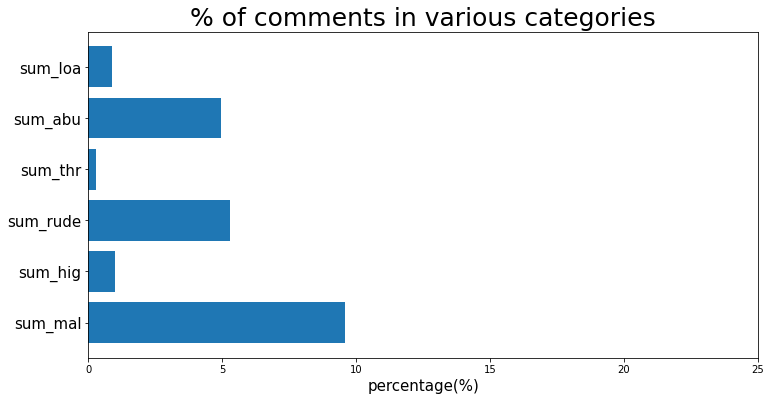

In [269]:
plt.figure(figsize=[12,6])
pp= plt.barh(dx,[sum_mal,sum_hig,sum_rude,sum_thr,sum_abu,sum_loa])
plt.xlabel("percentage(%)",size=15)
plt.xticks(np.arange(0,30,5))
plt.title("% of comments in various categories",size=25)
plt.yticks(dx,("sum_mal","sum_hig","sum_rude","sum_thr","sum_abu","sum_loa"),size=15)
plt.show()

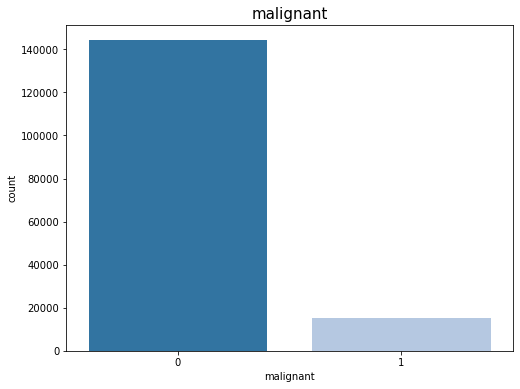

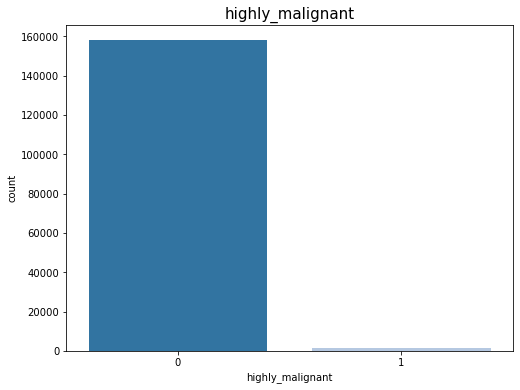

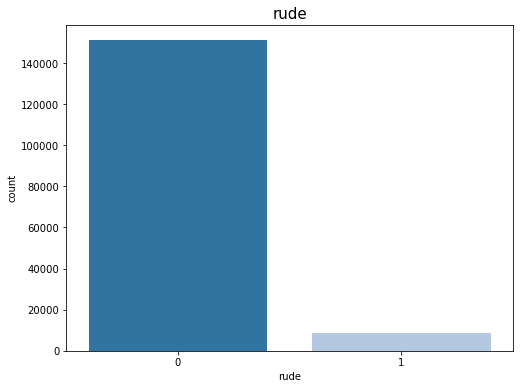

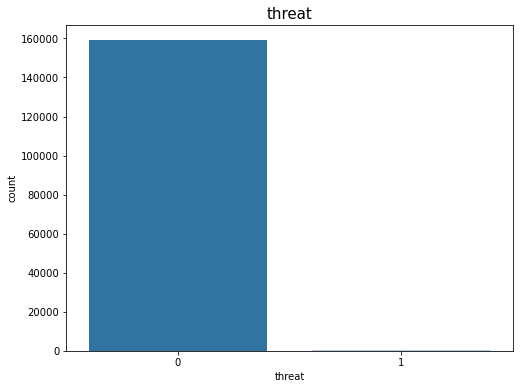

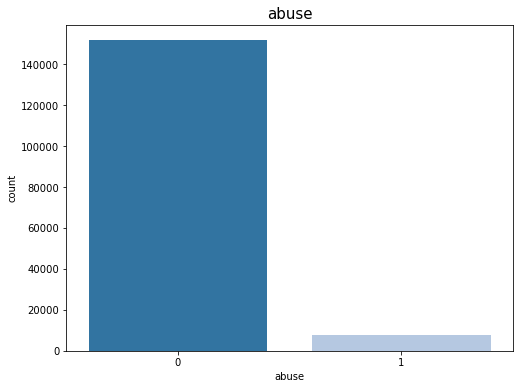

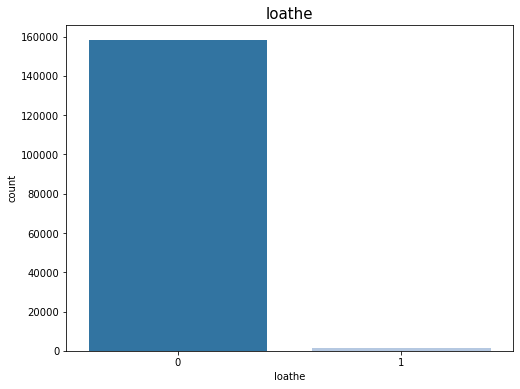

In [270]:
for i in train.iloc[:,2:]:
    plt.figure(figsize=[8,6])
    plt.title(i,size=15)
    sns.countplot(train[i],palette='tab20')
    plt.show()

In [271]:
import string

In [272]:
train['comment_text']=train['comment_text'].str.lower()

In [274]:
train.drop(['id'],axis=1,inplace=True)

In [275]:
train['comment_text']=train['comment_text'].str.replace("won't","will not")

In [276]:
train['comment_text']=train['comment_text'].str.replace("can't","can not")

In [277]:
train['comment_text']=train['comment_text'].str.replace("weren't","were not")

In [279]:
train['comment_text']=train['comment_text'].str.replace(r"\'t","not")
train['comment_text']=train['comment_text'].str.replace(r"\'re","are")
train['comment_text']=train['comment_text'].str.replace(r"\'d","would")
train['comment_text']=train['comment_text'].str.replace(r"\'ll","will")
train['comment_text']=train['comment_text'].str.replace(r"\'t","not")
train['comment_text']=train['comment_text'].str.replace(r"\'ve","have")
train['comment_text']=train['comment_text'].str.replace(r"\'m","am")

In [281]:
train['comment_text']=train['comment_text'].replace("[^a-zA-Z]"," ",regex=True)

In [285]:
from nltk.stem import WordNetLemmatizer

In [287]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [291]:
cols_output = ['malignant','highly_malignant','rude','threat','abuse','loathe']

In [314]:
target_data = train[cols_output]WordNetLemmatizer

train['bad']=train[cols_output].sum(axis=1)
print(train['bad'].value_counts())
train['bad']=train['bad']>0
train['bad']=train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


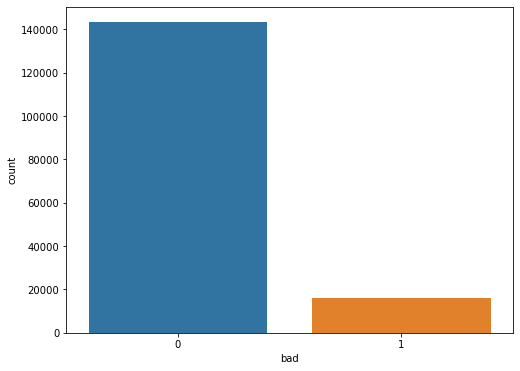

In [315]:
plt.figure(figsize=[8,6])
sns.countplot(train['bad'])
plt.show()

In [318]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec=TfidfVectorizer(max_features = 10000,stop_words='english')
features= tf_vec.fit_transform(train['comment_text'])
x=features

In [321]:
from sklearn.model_selection import train_test_split

In [323]:
y=train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [326]:
y_train.shape,y_test.shape

((127656,), (31915,))

In [332]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# Decision Tree Classifier

In [328]:
df = DecisionTreeClassifier()

In [329]:
df.fit(x_train,y_train)

DecisionTreeClassifier()

In [330]:
df.score(x_test,y_test)

0.9411561961460129

In [331]:
y_pred = df.predict(x_test)

In [336]:
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score : 0.9411561961460129
[[27805   866]
 [ 1012  2232]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     28671
           1       0.72      0.69      0.70      3244

    accuracy                           0.94     31915
   macro avg       0.84      0.83      0.84     31915
weighted avg       0.94      0.94      0.94     31915



# Random Forest Classifier

In [338]:
rf = RandomForestClassifier()
rf.fit(x_test,y_test)
pred=rf.predict(x_test)
print("Accuracy Score :",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score : 0.9992480025066584
[[28669     2]
 [   22  3222]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28671
           1       1.00      0.99      1.00      3244

    accuracy                           1.00     31915
   macro avg       1.00      1.00      1.00     31915
weighted avg       1.00      1.00      1.00     31915



# Logistic Regression

In [339]:
lm=LogisticRegression()
lm.fit(x_test,y_test)
pred=lm.predict(x_test)
print("Accuracy Score :",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score : 0.9521854927150243
[[28633    38]
 [ 1488  1756]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     28671
           1       0.98      0.54      0.70      3244

    accuracy                           0.95     31915
   macro avg       0.96      0.77      0.84     31915
weighted avg       0.95      0.95      0.95     31915



# Gredient Boosting Classifier

In [340]:
gb = GradientBoostingClassifier()
gb.fit(x_test,y_test)
pred=gb.predict(x_test)
print("Accuracy Score :",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score : 0.945542848190506
[[28633    38]
 [ 1700  1544]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28671
           1       0.98      0.48      0.64      3244

    accuracy                           0.95     31915
   macro avg       0.96      0.74      0.81     31915
weighted avg       0.95      0.95      0.94     31915



# Adaboost Classifier

In [341]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print("Accuracy Score :",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score : 0.9459815133949554
[[28436   235]
 [ 1489  1755]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28671
           1       0.88      0.54      0.67      3244

    accuracy                           0.95     31915
   macro avg       0.92      0.77      0.82     31915
weighted avg       0.94      0.95      0.94     31915



# Xgboost Regressior

In [342]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
pred=xgb.predict(x_test)
print("Accuracy Score :",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score : 0.9543788187372709
[[28497   174]
 [ 1282  1962]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28671
           1       0.92      0.60      0.73      3244

    accuracy                           0.95     31915
   macro avg       0.94      0.80      0.85     31915
weighted avg       0.95      0.95      0.95     31915



In [358]:
test.drop(["id"],axis=1,inplace=True)

In [359]:
test=tf_vec.fit_transform(test['comment_text'])
test

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [360]:
from sklearn.model_selection import cross_val_score

In [361]:
name=[df,rf,lm,gb,ad,xgb]

In [362]:
for i in name:
    cvs=cross_val_score(i,x,y,cv=9)
    print('Cross validation of',i,"is:",cvs.mean())

Cross validation of DecisionTreeClassifier() is: 0.9416497908853635
Cross validation of RandomForestClassifier() is: 0.9563454522877449
Cross validation of LogisticRegression() is: 0.956658778136424
Cross validation of GradientBoostingClassifier() is: 0.9404591032494918
Cross validation of AdaBoostClassifier() is: 0.9458234801811268
Cross validation of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_s

In [364]:
predict=rf.predict(test)
predict

array([0, 0, 0, ..., 0, 1, 0])

In [365]:
import joblib

In [368]:
joblib.dump(rf,"MALIGNANT COMMENTS CLASSIFICATION PROJECT")

['MALIGNANT COMMENTS CLASSIFICATION PROJECT']